In [ ]:
#necessary libraries for the task
import pandas as pd
import gzip
import json
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  # Import SVC for Support Vector Machine
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.metrics import precision_score, f1_score, classification_report

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Define the file path to your dataset in Google Drive
file_path = '/content/drive/MyDrive/trainingData (4).gz'


Mounted at /content/drive


In [ ]:
df = pd.read_json('/content/drive/MyDrive/trainingData (4).gz', lines=True)
df.head()

,id_left,category_left,cluster_id_left,id_right,category_right,cluster_id_right,label,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,2551242,Computers_and_Accessories,79457,16272671,Computers_and_Accessories,79457,1,2551242#16272671,"""Corsair""@en",None,"""DDR4, 2666MHz, CL16, 1.2v, XMP 2.0, Lifetime ...",None,"{'Memory Type': 'DDR4 (PC4-21300)', 'Capacity'...","{'Categorie': 'Geheugen intern', 'Merk': 'Cors...",None,None,Memory Type DDR4 (PC4-21300) Capacity 64GB (4...,Categorie Geheugen intern Merk Corsair Produc...,"""Corsair Vengeance LPX Black 64GB (4x16GB) DD...","""Corsair Vengeance LPX CMK64GX4M4A2666C16 - P..."
1,16757469,Computers_and_Accessories,63553,16476204,Computers_and_Accessories,63553,1,16757469#16476204,"""HP Enterprise""","""HP Enterprise""","""Description:2 x 72GB 2.5-inch Serial Attached...","""Description:10 x 72GB 2.5-inch Serial Attach...","{'Category': 'Proliant HardDrive', 'Sub-Catego...","{'Category': 'Proliant HardDrive', 'Sub-Catego...",None,"""CAD"", ""$757.74 CAD""",Specifications: Category Proliant HardDrive S...,Specifications: Category Proliant HardDrive S...,"""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"", ""Nu...","""DH0072BALWL HP 72-GB 3G 15K 2.5 DP SAS"" ""Null"""
2,232007,Computers_and_Accessories,212917,16442945,Computers_and_Accessories,14319765,0,232007#16442945,"""SanDisk""","""HP Enterprise""","""SDSDJ-1024 BXP 1GB 9p SD Class 2 Secure Digi...","""Description:Genuine HPE 1GB FBD PC2-5300(2x5...",None,"{'Category': 'Proliant Memory', 'Sub-Category'...","""USD"", ""7.98""","""USD"", ""$69.95""",None,Specifications: Category Proliant Memory Sub-...,"""SanDisk SDSDJ-1024 BXP 1GB 9p SD Class 2 Sec...","""397409-B21 HP 1GB (2x512MB) PC2-5300 SDRAM"" ..."
3,2066119,Computers_and_Accessories,667772,12411100,Computers_and_Accessories,667772,1,2066119#12411100,None,"""KINGSTON""","""DISCO DURO INTERNO SOLIDO HDD SSD""@es",None,None,None,None,None,None,None,"""DISCO DURO INTERNO SOLIDO HDD SSD KINGSTON V...","""DISCO DURO SSD Kingston Technology SSDNow V3..."
4,6656540,Computers_and_Accessories,505997,2639431,Computers_and_Accessories,154118,0,6656540#2639431,None,"""Corsair""",None,None,None,None,None,None,None,None,"""Corsair Vengeance LED 32GB (2 x 16GB) DDR4 D...","""Corsair - Vengeance LPX 32GB (2 x 16GB) DDR4..."


In [ ]:
#Viewing sample data
df.sample(5)  # View 5 random rows


,id_left,category_left,cluster_id_left,id_right,category_right,cluster_id_right,label,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
59182,3071436,Computers_and_Accessories,167239,15489150,Computers_and_Accessories,167239,1,3071436#15489150,None,"""HP Enterprise""","""There are many demands on your serverâ¦is it...","""Description:2 x HP 16GB (1x16GB) Dual Rank x4...",None,None,"""$"", ""389.99""",None,None,None,"""HPE - DDR3 16 GB DIMM 240-pin"" "" HPE 240-pin...","""Null"", ""708641-B21 HP 16GB (1x16GB) SDRAM DI..."
10398,11900541,Computers_and_Accessories,34641,1919562,Computers_and_Accessories,34641,1,11900541#1919562,"""Asus""@en",None,"""Intel H81 Chipset, x2 DDR3, x1 PCI-E x16, x2 ...","""ASUS H81I-PLUS, Intel H81, S 1150, DDR3, SATA...",None,None,None,None,None,None,"""Asus H81I-Plus Intel H81 (Socket 1150) DDR3 ...","""ASUS H81I-Plus Mini-ITX Motherboard""@en Moth..."
51007,17536794,Computers_and_Accessories,420491,9506450,Computers_and_Accessories,10374454,0,17536794#9506450,"""Intel""@en-US","""INTEL""","""Intel BX80637I73770K Core i7-3770K Ivy Bridge...",None,None,None,None,None,None,None,"""Intel Core i7-3770K Quad-Core Processor 3.5 ...","""Intel Core i5-3570"" ""Comprar Intel i5-3570 -..."
60623,1720353,Computers_and_Accessories,207382,7249374,Computers_and_Accessories,207382,1,1720353#7249374,"""Intel""@en-GB","""INTEL""@fr",None,None,None,None,None,None,None,None,"""CORE I3-6100 3.70GHZ""@en-GB 3.70GHZ | BX8066...","""S1151 Core i3-6100 (2Core, 3.7Ghz, 3Mb, HD53..."
1677,793266,Computers_and_Accessories,884781,13182618,Computers_and_Accessories,163868,0,793266#13182618,None,None,None,None,"{'Brand': 'Seagate', 'Part #': 'ST2000DM001', ...",None,None,None,General Information: Brand Seagate Part # ST2...,None,"""ST2000DM001 Seagate 2TB 7200RPM SATA 6.0 Gbp...","""Buy Online | Seagate BarraCuda ST2000DM006 2..."


EXPLORATORY DATA ANALYSIS

In [ ]:
# Initial data inspection
print("Dataset Shape:", df.shape)
print("Columns:", df.columns[:10])  # Show first 10 columns for brevity
print(df.head())

Dataset Shape: (68461, 20)
Columns: Index(['id_left', 'category_left', 'cluster_id_left', 'id_right',
       'category_right', 'cluster_id_right', 'label', 'pair_id', 'brand_left',
       'brand_right'],
      dtype='object')
    id_left              category_left  cluster_id_left  id_right  \
0   2551242  Computers_and_Accessories            79457  16272671   
1  16757469  Computers_and_Accessories            63553  16476204   
2    232007  Computers_and_Accessories           212917  16442945   
3   2066119  Computers_and_Accessories           667772  12411100   
4   6656540  Computers_and_Accessories           505997   2639431   

              category_right  cluster_id_right  label            pair_id  \
0  Computers_and_Accessories             79457      1   2551242#16272671   
1  Computers_and_Accessories             63553      1  16757469#16476204   
2  Computers_and_Accessories          14319765      0    232007#16442945   
3  Computers_and_Accessories            667772      1  

In [ ]:
#checking rows and columns
#some EDAs on the JSON dataset
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


Number of rows: 68461
Number of columns: 20


In [ ]:
# List all the columns in the dataset
print(df.columns)


Index(['id_left', 'category_left', 'cluster_id_left', 'id_right',
       'category_right', 'cluster_id_right', 'label', 'pair_id', 'brand_left',
       'brand_right', 'description_left', 'description_right',
       'keyValuePairs_left', 'keyValuePairs_right', 'price_left',
       'price_right', 'specTableContent_left', 'specTableContent_right',
       'title_left', 'title_right'],
      dtype='object')


In [ ]:
#Datatypes of columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68461 entries, 0 to 68460
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id_left                 68461 non-null  int64 
 1   category_left           68461 non-null  object
 2   cluster_id_left         68461 non-null  int64 
 3   id_right                68461 non-null  int64 
 4   category_right          68461 non-null  object
 5   cluster_id_right        68461 non-null  int64 
 6   label                   68461 non-null  int64 
 7   pair_id                 68461 non-null  object
 8   brand_left              34233 non-null  object
 9   brand_right             34245 non-null  object
 10  description_left        47460 non-null  object
 11  description_right       48360 non-null  object
 12  keyValuePairs_left      18765 non-null  object
 13  keyValuePairs_right     20275 non-null  object
 14  price_left              11521 non-null  object
 15  pr

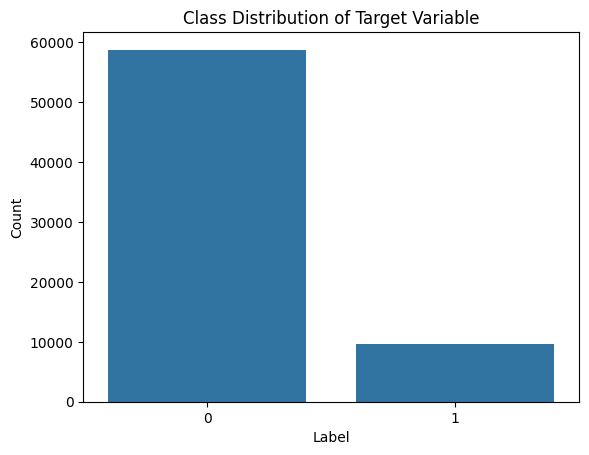

In [ ]:
#understanding the target variables and checking if the dataset is balanced
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='label', data=df)
plt.title('Class Distribution of Target Variable')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


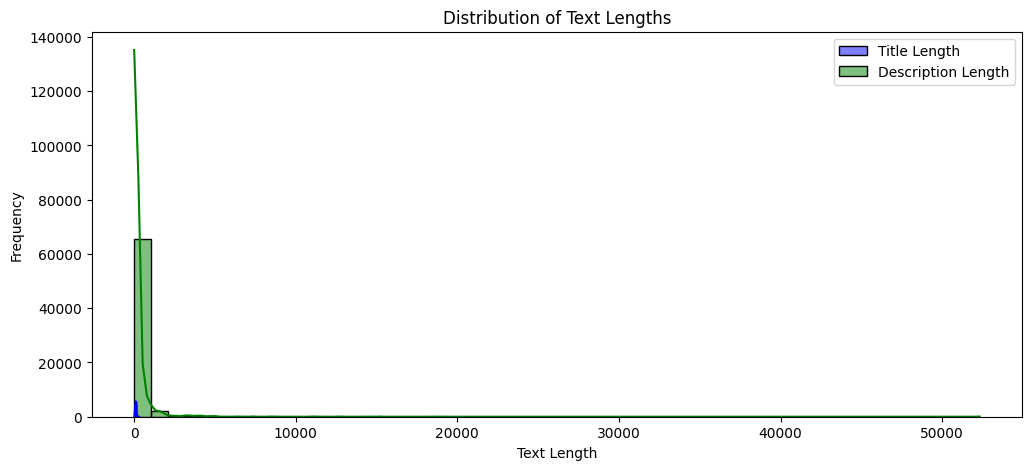

In [ ]:
#Text Length Distributions
#Plot the distribution of text lengths in title_left and description_left to see the typical size of these fields, which can be helpful for understanding variability in textual data.

# Calculate text lengths
df['title_left_len'] = df['title_left'].fillna('').apply(len)
df['description_left_len'] = df['description_left'].fillna('').apply(len)

# Plot distributions
plt.figure(figsize=(12, 5))
sns.histplot(df['title_left_len'], bins=50, kde=True, color='blue', label='Title Length')
sns.histplot(df['description_left_len'], bins=50, kde=True, color='green', label='Description Length')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


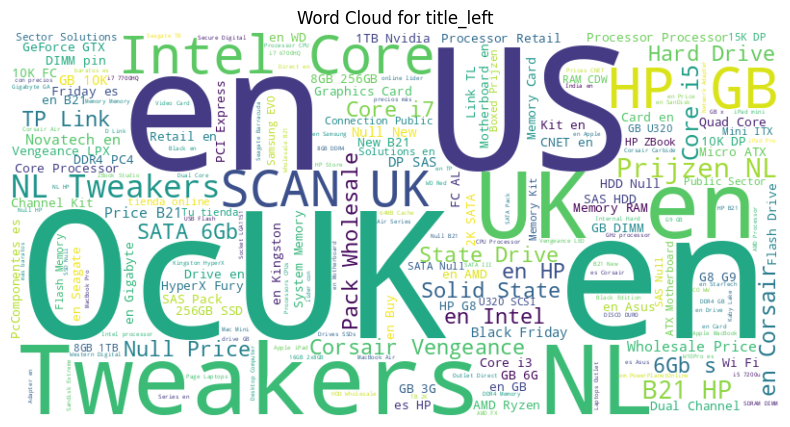

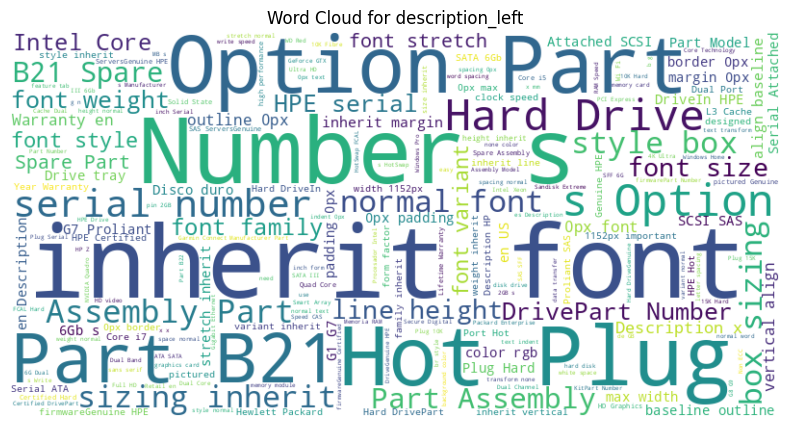

In [ ]:
#visualizing
#Word Cloud for Text Columns
#Word clouds provide an intuitive sense of the most frequent words.
#Generate separate word clouds for title_left and description_left (or their counterparts) to understand their most common terms.

from wordcloud import WordCloud

# Word Cloud for Title
title_text = ' '.join(df['title_left'].fillna(''))
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(title_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for title_left')
plt.show()

# Word Cloud for Description
description_text = ' '.join(df['description_left'].fillna(''))
wordcloud_description = WordCloud(width=800, height=400, background_color='white').generate(description_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_description, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for description_left')
plt.show()


In [ ]:
#Basic descriptive statistics
#Summary of numerical columns
df.describe()  # This will only include numerical columns


,id_left,cluster_id_left,id_right,cluster_id_right,label,title_left_len,description_left_len
count,6.846100e+04,6.846100e+04,6.846100e+04,6.846100e+04,68461.000000,68461.000000,68461.000000
mean,9.781789e+06,1.825575e+06,1.000838e+07,1.900250e+06,0.141540,90.943778,275.711500
std,5.329992e+06,3.623020e+06,5.367564e+06,3.626106e+06,0.348581,31.500176,1150.011987
min,2.812000e+03,1.201000e+03,2.812000e+03,1.201000e+03,0.000000,15.000000,0.000000
25%,5.198162e+06,1.884970e+05,5.496548e+06,1.772040e+05,0.000000,67.000000,0.000000
50%,1.016803e+07,4.962920e+05,1.059241e+07,5.039460e+05,0.000000,94.000000,113.000000
75%,1.471780e+07,1.053863e+06,1.504517e+07,1.113758e+06,0.000000,111.000000,239.000000
max,1.755749e+07,1.636838e+07,1.755749e+07,1.636838e+07,1.000000,302.000000,52318.000000


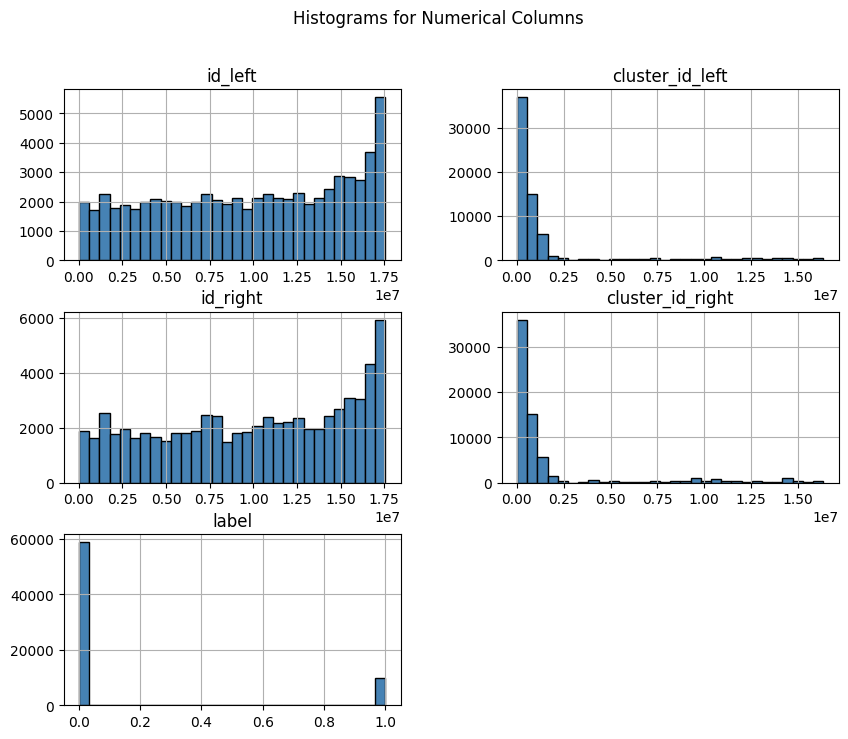

In [ ]:
# Univariate Analysis (Histograms for Numerical Features):
# Plot histograms for numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plotting histograms for the first 5 numerical columns
df[numerical_cols[:5]].hist(bins=30, figsize=(10,8), color='steelblue', edgecolor='black')
plt.suptitle("Histograms for Numerical Columns")
plt.show()

In [ ]:
#summary of categorical columns (summarize non-numerical columns)
df.describe(include='object')


,category_left,category_right,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
count,68461,68461,68461,34233,34245,47460,48360,18765,20275,11521,11492,20897,22157,68461,68461
unique,9,9,68461,301,290,2478,2400,900,890,542,519,1013,998,4277,4134
top,Computers_and_Accessories,Computers_and_Accessories,2551242#16272671,"""HP Enterprise""","""HP Enterprise""","""Null""@es","""Null""@es","{'Categorie': 'Interne harde schijven', 'Merk'...","{'Category': 'Proliant Memory', 'Sub-Category'...","""USD""","""USD""",Categorie Interne harde schijven Merk Seagate...,Specifications: Category Proliant Memory Sub-...,"""DISCO DURO INTERNO SOLIDO HDD SSD""","""Transcend Ultimate - flash memory card 32 GB..."
freq,64958,66972,1,9069,10539,574,418,89,157,395,389,89,157,45,116


In [ ]:
#Checking for Nested JSON structure
#Nested columns
# Check for nested structures in a specific column (replaced 'column_name' with actual column name)
print(df['category_left'].iloc[0])


Computers_and_Accessories


In [ ]:

#Flatten nested column
# Flatten the nested JSON column
flat_data = pd.json_normalize(df['category_left'])

# Concatenate the flattened data with the main dataset (if needed)
data = pd.concat([df, flat_data], axis=1)


In [ ]:
# Identify columns with dict objects and print unique value counts for others
for col in df.select_dtypes(include='object').columns:
    # Check if any values in the column are dicts
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Column '{col}' contains dict objects, skipping unique count.")
    else:
        print(f"Column '{col}' has {df[col].nunique()} unique values")


Column 'category_left' has 9 unique values
Column 'category_right' has 9 unique values
Column 'pair_id' has 68461 unique values
Column 'brand_left' has 301 unique values
Column 'brand_right' has 290 unique values
Column 'description_left' has 2478 unique values
Column 'description_right' has 2400 unique values
Column 'keyValuePairs_left' contains dict objects, skipping unique count.
Column 'keyValuePairs_right' contains dict objects, skipping unique count.
Column 'price_left' has 542 unique values
Column 'price_right' has 519 unique values
Column 'specTableContent_left' has 1013 unique values
Column 'specTableContent_right' has 998 unique values
Column 'title_left' has 4277 unique values
Column 'title_right' has 4134 unique values


In [ ]:
# Identify columns with unhashable types (like dicts) and exclude them
columns_to_check = [col for col in df.columns if not df[col].apply(lambda x: isinstance(x, dict)).any()]

# Check for duplicate rows in the specified columns
duplicates = df[columns_to_check].duplicated()  # Check only hashable columns

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

# Optionally, display the duplicate rows if any exist
if num_duplicates > 0:
    duplicate_rows = df[duplicates]
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


In [ ]:
#Count Missing Values for the whole data
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


brand_left                34228
brand_right               34216
description_left          21001
description_right         20101
keyValuePairs_left        49696
keyValuePairs_right       48186
price_left                56940
price_right               56969
specTableContent_left     47564
specTableContent_right    46304
dtype: int64


In [ ]:
#missing values per column
print("Missing Values Per Column:")
print(missing_values)

Missing Values Per Column:
id_left                       0
category_left                 0
cluster_id_left               0
id_right                      0
category_right                0
cluster_id_right              0
label                         0
pair_id                       0
brand_left                34228
brand_right               34216
description_left          21001
description_right         20101
keyValuePairs_left        49696
keyValuePairs_right       48186
price_left                56940
price_right               56969
specTableContent_left     47564
specTableContent_right    46304
title_left                    0
title_right                   0
title_left_len                0
description_left_len          0
dtype: int64


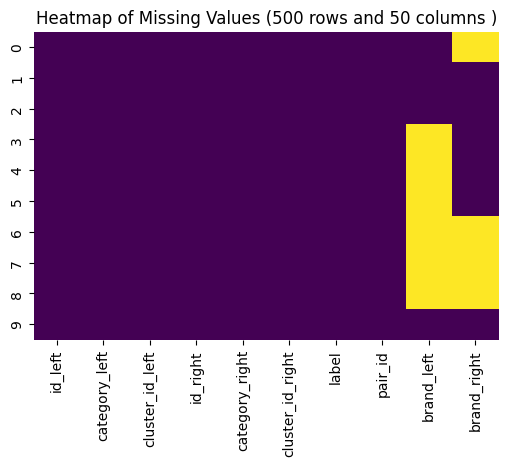

In [ ]:
# visualizing a subset of the data to check its missing values and visualize it
subset_df = df.iloc[:10, :10]
plt.figure(figsize=(6, 4))  # Smaller figure size to reduce memory
sns.heatmap(subset_df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missing Values (500 rows and 50 columns )")
plt.show()




In [ ]:
# Display the percentage of missing values per column
missing_percentage = (df.isnull().mean() * 100).sort_values(ascending=False)
print("\nPercentage of Missing Values Per Column:")
print(missing_percentage)


Percentage of Missing Values Per Column:
price_right               83.213801
price_left                83.171441
keyValuePairs_left        72.590234
keyValuePairs_right       70.384599
specTableContent_left     69.476052
specTableContent_right    67.635588
brand_left                49.996348
brand_right               49.978820
description_left          30.675859
description_right         29.361242
title_left_len             0.000000
title_right                0.000000
title_left                 0.000000
id_left                    0.000000
category_left              0.000000
pair_id                    0.000000
label                      0.000000
cluster_id_right           0.000000
category_right             0.000000
id_right                   0.000000
cluster_id_left            0.000000
description_left_len       0.000000
dtype: float64


In [ ]:
#Handling Missing Values for numerical columns (using mean)
# Step 1: Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Step 2: Identify numeric columns that have missing values
numeric_columns_with_missing = [col for col in numeric_columns if df[col].isnull().sum() > 0]

# Step 3: Impute missing values in numeric columns using the mean
for col in numeric_columns_with_missing:
    df[col] = df[col].fillna(df[col].mean())


# Step 4: Verifying if missing values were handled
print(df[numeric_columns_with_missing].isnull().sum())




Series([], dtype: float64)


In [ ]:
# Check if there are any remaining missing values in numeric columns
remaining_missing_values = df[numeric_columns_with_missing].isnull().sum()
print("Remaining missing values in numeric columns after imputation:")
print(remaining_missing_values)


Remaining missing values in numeric columns after imputation:
Series([], dtype: float64)


In [ ]:
# Handling missing values for categorical columns (using mode)

# Step 1: Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 2: Identify categorical columns with missing values
categorical_columns_with_missing = [col for col in categorical_columns if df[col].isnull().sum() > 0]

# Step 3: Impute missing values in categorical columns using the mode
for col in categorical_columns_with_missing:
    mode_value = df[col].mode()[0]  # Get the mode of the column
    df[col] = df[col].fillna(mode_value)  # Fill missing values with the mode



In [ ]:
# Check for missing values in categorical columns after imputation
missing_values_after_imputation = df.select_dtypes(include=['object']).isnull().sum()

# Filter to show only columns with remaining missing values
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

# Display the results
if missing_values_after_imputation.empty:
    print("All missing values in categorical columns have been handled.")
else:
    print("Remaining missing values in categorical columns:")
    print(missing_values_after_imputation)

Remaining missing values in categorical columns:
keyValuePairs_left     49696
keyValuePairs_right    48186
dtype: int64


In [ ]:
# since the columns still have missing values, i am including a placeholder
# 'Unknown'
df['keyValuePairs_left'] = df['keyValuePairs_left'].fillna("Unknown")
df['keyValuePairs_right'] = df['keyValuePairs_right'].fillna("Unknown")


In [ ]:
# Check for missing values in categorical columns after imputation again
missing_values_after_imputation = df.select_dtypes(include=['object']).isnull().sum()

# Filter to show only columns with remaining missing values
missing_values_after_imputation = missing_values_after_imputation[missing_values_after_imputation > 0]

# Display the results
if missing_values_after_imputation.empty:
    print("All missing values in categorical columns have been handled.")
else:
    print("Remaining missing values in categorical columns:")
    print(missing_values_after_imputation)

All missing values in categorical columns have been handled.


In [ ]:
# Convert categorical data into a format that can be used by machine learning
# algorithms(eg,) one-hot encoding or label encoding. %%
# Create a TF-IDF Vectorizer
# Example: One-hot encoding categorical columns


# Check which columns contain dictionaries
for col in df.columns:
    if df[col].apply(lambda x: isinstance(x, dict)).any():
        print(f"Column '{col}' contains dictionary-type values.")



Column 'keyValuePairs_left' contains dictionary-type values.
Column 'keyValuePairs_right' contains dictionary-type values.


In [ ]:
# Flatten a dictionary column 'KeyValuePairs_left', and 'KeyValuePairs_right'

# Flatten dictionary columns
# Expand 'keyValuePairs_left' column
if 'keyValuePairs_left' in df.columns:
    keyValuePairs_left_df = pd.json_normalize(df['keyValuePairs_left'])
    # Rename columns to indicate they are from 'keyValuePairs_left'
    keyValuePairs_left_df.columns = [f"keyValuePairs_left_{col}" for col in keyValuePairs_left_df.columns]
    df = df.drop(columns=['keyValuePairs_left']).join(keyValuePairs_left_df)

# Expand 'keyValuePairs_right' column
if 'keyValuePairs_right' in df.columns:
    keyValuePairs_right_df = pd.json_normalize(df['keyValuePairs_right'])
    # Rename columns to indicate they are from 'keyValuePairs_right'
    keyValuePairs_right_df.columns = [f"keyValuePairs_right_{col}" for col in keyValuePairs_right_df.columns]
    df = df.drop(columns=['keyValuePairs_right']).join(keyValuePairs_right_df)

# Verify that the columns have been successfully flattened
print(df.head())


    id_left              category_left  cluster_id_left  id_right  \
0   2551242  Computers_and_Accessories            79457  16272671   
1  16757469  Computers_and_Accessories            63553  16476204   
2    232007  Computers_and_Accessories           212917  16442945   
3   2066119  Computers_and_Accessories           667772  12411100   
4   6656540  Computers_and_Accessories           505997   2639431   

              category_right  cluster_id_right  label            pair_id  \
0  Computers_and_Accessories             79457      1   2551242#16272671   
1  Computers_and_Accessories             63553      1  16757469#16476204   
2  Computers_and_Accessories          14319765      0    232007#16442945   
3  Computers_and_Accessories            667772      1   2066119#12411100   
4  Computers_and_Accessories            154118      0    6656540#2639431   

        brand_left      brand_right  ... keyValuePairs_right_Execution Units  \
0     "Corsair"@en  "HP Enterprise"  ...        

In [ ]:
# Check for remaining missing values
missing_values = df.isnull().sum()
print("Remaining missing values in each column:\n", missing_values[missing_values > 0])

Remaining missing values in each column:
 keyValuePairs_left_Memory Type                                                                                                                                                                                                                                                                                                                                                     66997
keyValuePairs_left_Capacity                                                                                                                                                                                                                                                                                                                                                        62024
keyValuePairs_left_Tested Speed                                                                                                                                                                             

In [ ]:
df.fillna("Unknown", inplace=True)

In [ ]:
# Check for remaining missing values
missing_values = df.isnull().sum()
print("Remaining missing values in each column:\n", missing_values[missing_values > 0])

Remaining missing values in each column:
 Series([], dtype: int64)


FEATURE IDENTIFICATION, SELECTION AND COMBINATION

In [ ]:
# Combine relevant text columns (title and description)
df['combined_text'] = (
    df['title_left'].fillna('') + " " +
    df['title_right'].fillna('') + " " +
    df['description_left'].fillna('') + " " +
    df['description_right'].fillna('')
)

DATA SPLITTING

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['combined_text'], df['label'], test_size=0.2, random_state=42)

TEXT VECTORIZATION USING TF-IDF

In [ ]:
#Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

MODEL TRAINING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Initialize the models
models = {
    "Logistic Regression": LogisticRegression(solver='saga', max_iter=500),
    "Decision Tree": DecisionTreeClassifier(max_depth=10),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}


In [ ]:
#Train, evaluate, and cross-validate each model
from imblearn.over_sampling import SMOTE
from collections import Counter

# SMOTE: Apply only on training data after vectorization
smote = SMOTE(random_state=42)

# Resample the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_tfidf, y_train)

# Verify class distribution after SMOTE
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Train the models on resampled data
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_resampled, y_train_resampled)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution before SMOTE: Counter({0: 47028, 1: 7740})
Class distribution after SMOTE: Counter({0: 47028, 1: 47028})
Training Logistic Regression...
Training Decision Tree...
Training Naive Bayes...
Training Random Forest...


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate models on the test data
for model_name, model in models.items():
    print("=" * 50)
    print(f"Evaluating {model_name} on Test Data...")
    print("=" * 50)

    # Predict on test data
    y_pred = model.predict(X_test_tfidf)

    # Print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("-" * 50)


Evaluating Logistic Regression on Test Data...
Accuracy: 0.8086
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.82      0.88     11743
           1       0.41      0.74      0.53      1950

    accuracy                           0.81     13693
   macro avg       0.68      0.78      0.70     13693
weighted avg       0.87      0.81      0.83     13693

Confusion Matrix:
[[9620 2123]
 [ 498 1452]]
--------------------------------------------------
Evaluating Decision Tree on Test Data...
Accuracy: 0.6166
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.60      0.73     11743
           1       0.23      0.73      0.35      1950

    accuracy                           0.62     13693
   macro avg       0.58      0.66      0.54     13693
weighted avg       0.83      0.62      0.67     13693

Confusion Matrix:
[[7016 4727]
 [ 523 1427]]
-------------------------------------

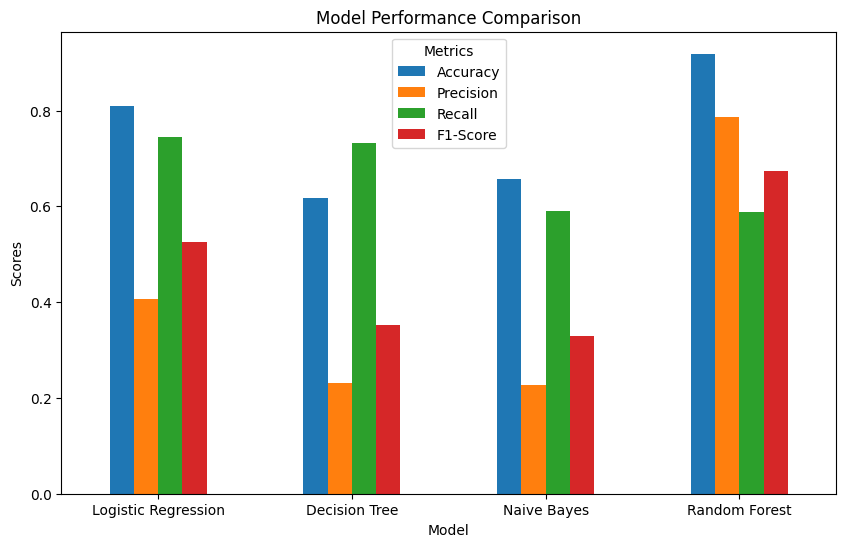

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize an empty list for metrics
metrics = []

# Evaluate models and store their performance metrics
for model_name, model in models.items():
    y_pred = model.predict(X_test_tfidf)  # Make predictions

    # Calculate metrics
    metrics.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='binary'),
        'Recall': recall_score(y_test, y_pred, average='binary'),
        'F1-Score': f1_score(y_test, y_pred, average='binary')
    })

# Convert metrics to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot the bar chart for model performance
metrics_df.set_index('Model').plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=0)  # Keep model names horizontal
plt.legend(title="Metrics")
plt.show()


Fine-Tuning using Randomized Search CV to tune Hyperparameters

Best Hyperparameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}

Confusion Matrix:
[[10845   898]
 [  708  1242]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11743
           1       0.58      0.64      0.61      1950

    accuracy                           0.88     13693
   macro avg       0.76      0.78      0.77     13693
weighted avg       0.89      0.88      0.88     13693



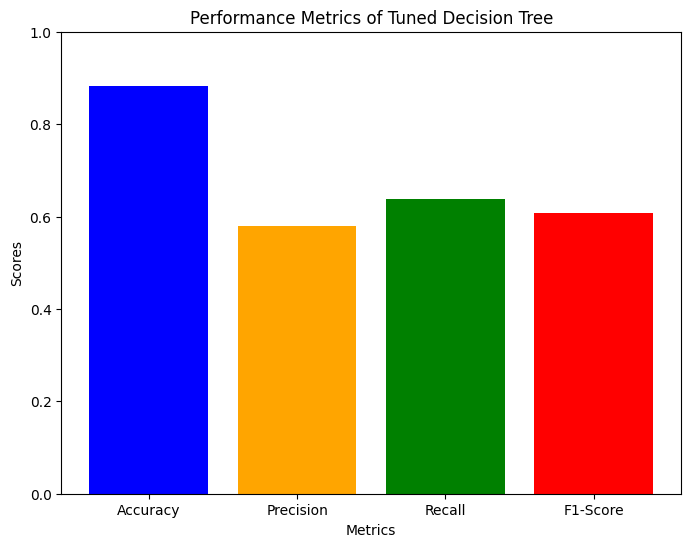

In [ ]:
# Import necessary libraries
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Fine-tuning using RandomizedSearchCV (faster alternative)
param_grid = {
    'max_depth': [5, 10, None],  # Reduced options
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}

# RandomizedSearchCV for faster hyperparameter tuning
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                   param_distributions=param_grid,
                                   n_iter=10,  # Limit the number of iterations
                                   cv=3, scoring='f1', verbose=0, n_jobs=-1, random_state=42)

# Train on resampled training data
random_search.fit(X_train_resampled, y_train_resampled)

# Step 2: Train the best model
best_dt_model = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)

# Step 3: Evaluate the model on test data
y_pred = best_dt_model.predict(X_test_tfidf)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Plot bar chart for performance comparison
metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Plot performance metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'orange', 'green', 'red'])
plt.title("Performance Metrics of Tuned Decision Tree")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.ylim(0, 1)  # this Ensure bars fit within 0-1 range
plt.show()


In [ ]:
#i also did fine-tuning for the other models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers that work with Logistic Regression
}

random_search_lr = RandomizedSearchCV(LogisticRegression(random_state=42),
                                      param_distributions=param_grid_lr,
                                      n_iter=8, cv=3, scoring='f1', n_jobs=-1, random_state=42)

random_search_lr.fit(X_train_resampled, y_train_resampled)
best_lr_model = random_search_lr.best_estimator_

print("Best Hyperparameters for Logistic Regression:", random_search_lr.best_params_)


Best Hyperparameters for Logistic Regression: {'solver': 'liblinear', 'C': 10}


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]  # Smoothing parameter
}

# RandomizedSearchCV for Naive Bayes
random_search_nb = RandomizedSearchCV(MultinomialNB(),
                                      param_distributions=param_grid_nb,
                                      n_iter=5,  # Limit the number of iterations
                                      cv=3, scoring='f1', n_jobs=-1, random_state=42)

# Fit the model on resampled training data
random_search_nb.fit(X_train_resampled, y_train_resampled)

# Retrieve the best model
best_nb_model = random_search_nb.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters for Naive Bayes:", random_search_nb.best_params_)


Best Hyperparameters for Naive Bayes: {'alpha': 0.01}


Evaluating Logistic Regression...

Confusion Matrix:
[[10037  1706]
 [  438  1512]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     11743
           1       0.47      0.78      0.59      1950

    accuracy                           0.84     13693
   macro avg       0.71      0.82      0.74     13693
weighted avg       0.89      0.84      0.86     13693



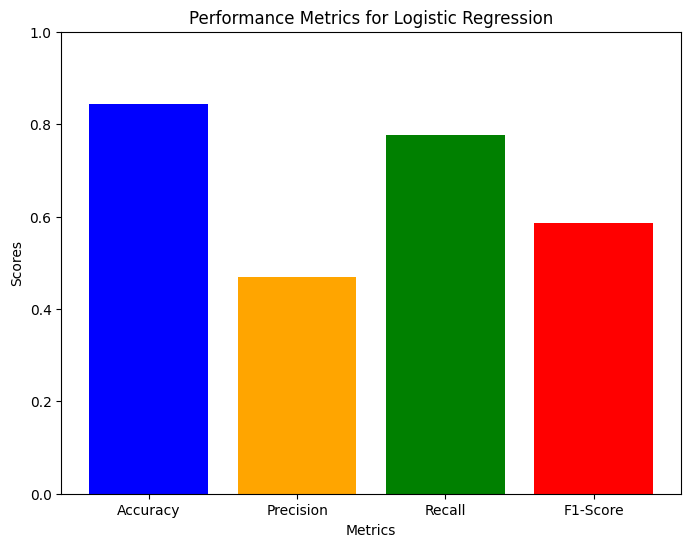

Evaluating Naive Bayes...

Confusion Matrix:
[[7872 3871]
 [ 801 1149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     11743
           1       0.23      0.59      0.33      1950

    accuracy                           0.66     13693
   macro avg       0.57      0.63      0.55     13693
weighted avg       0.81      0.66      0.71     13693



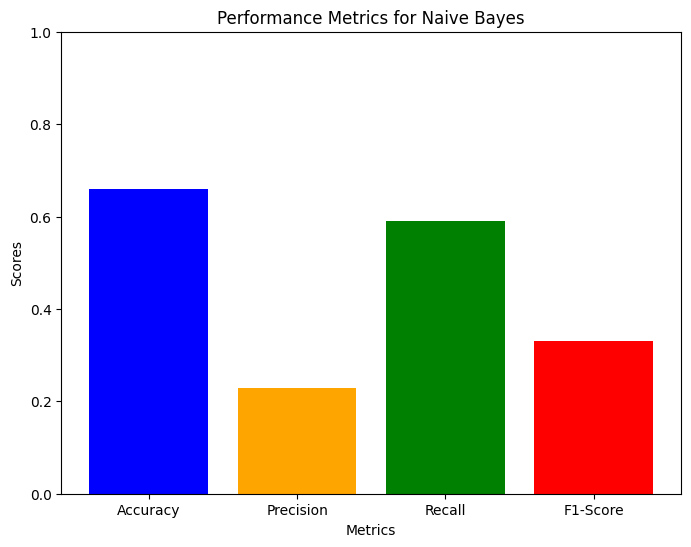

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Fine-tuned models: Only Logistic Regression and Naive Bayes
tuned_models = {
    'Logistic Regression': best_lr_model,
    'Naive Bayes': best_nb_model
}

# Evaluate each model and plot its metrics
for model_name, model in tuned_models.items():
    print("=" * 50)
    print(f"Evaluating {model_name}...")

    # Predict on the test dataset
    y_pred = model.predict(X_test_tfidf)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')

    # Print confusion matrix and classification report
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Prepare metrics for plotting
    metrics = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
        'Score': [accuracy, precision, recall, f1]
    }
    metrics_df = pd.DataFrame(metrics)

    # Plot bar chart for the current model
    plt.figure(figsize=(8, 6))
    plt.bar(metrics_df['Metric'], metrics_df['Score'], color=['blue', 'orange', 'green', 'red'])
    plt.title(f"Performance Metrics for {model_name}")
    plt.xlabel("Metrics")
    plt.ylabel("Scores")
    plt.ylim(0, 1)  # Set y-axis between 0 and 1
    plt.show()


Fine-Tuning Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters for Random Forest: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
Evaluating Random Forest on Test Data...

Confusion Matrix:
[[11378   365]
 [  807  1143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11743
           1       0.76      0.59      0.66      1950

    accuracy                           0.91     13693
   macro avg       0.85      0.78      0.81     13693
weighted avg       0.91      0.91      0.91     13693



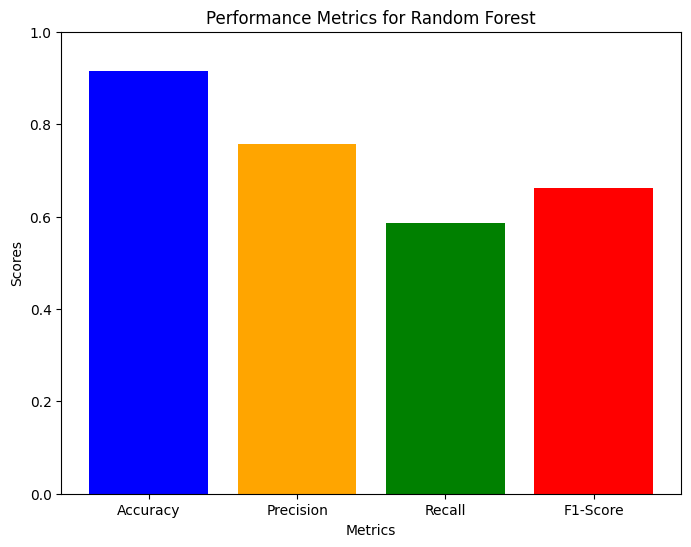

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

# Add Random Forest model to the models dictionary
models["Random Forest"] = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest using RandomizedSearchCV
param_grid_rf = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [10, 20, None],       # Depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum samples required to split
    'min_samples_leaf': [1, 2, 4]      # Minimum samples at leaf node
}

# Apply RandomizedSearchCV
print("Fine-Tuning Random Forest...")
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_grid_rf,
    n_iter=10,
    cv=3,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit RandomizedSearchCV on resampled data
random_search_rf.fit(X_train_resampled, y_train_resampled)
best_rf_model = random_search_rf.best_estimator_

print("Best Hyperparameters for Random Forest:", random_search_rf.best_params_)

# Evaluate the fine-tuned Random Forest model
print("=" * 50)
print("Evaluating Random Forest on Test Data...")
y_rf_pred = best_rf_model.predict(X_test_tfidf)

# Print performance metrics for Random Forest
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_rf_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_rf_pred))

# Calculate and display metrics
rf_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Score': [
        accuracy_score(y_test, y_rf_pred),
        precision_score(y_test, y_rf_pred, average='binary'),
        recall_score(y_test, y_rf_pred, average='binary'),
        f1_score(y_test, y_rf_pred, average='binary')
    ]
}

# Convert to DataFrame and plot
rf_metrics_df = pd.DataFrame(rf_metrics)

plt.figure(figsize=(8, 6))
plt.bar(rf_metrics_df['Metric'], rf_metrics_df['Score'], color=['blue', 'orange', 'green', 'red'])
plt.title("Performance Metrics for Random Forest")
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.ylim(0, 1)
plt.show()


CONFUSION MATRIX FOR ALL MODELS


Evaluating Decision Tree...
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     11743
           1       0.58      0.64      0.61      1950

    accuracy                           0.88     13693
   macro avg       0.76      0.78      0.77     13693
weighted avg       0.89      0.88      0.88     13693



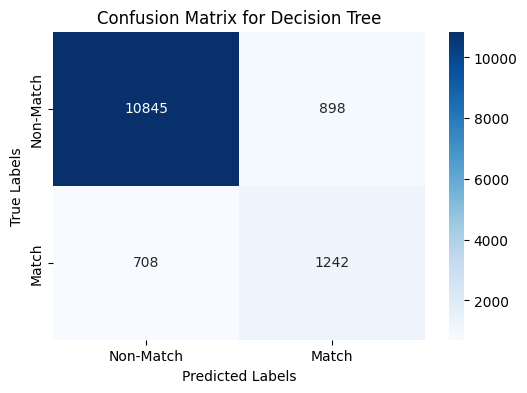


Evaluating Logistic Regression...
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     11743
           1       0.47      0.78      0.59      1950

    accuracy                           0.84     13693
   macro avg       0.71      0.82      0.74     13693
weighted avg       0.89      0.84      0.86     13693



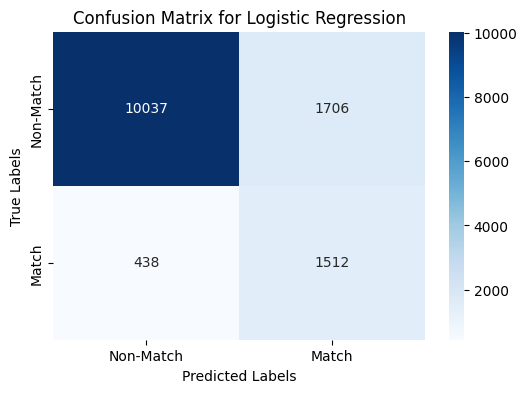


Evaluating Naive Bayes...
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.67      0.77     11743
           1       0.23      0.59      0.33      1950

    accuracy                           0.66     13693
   macro avg       0.57      0.63      0.55     13693
weighted avg       0.81      0.66      0.71     13693



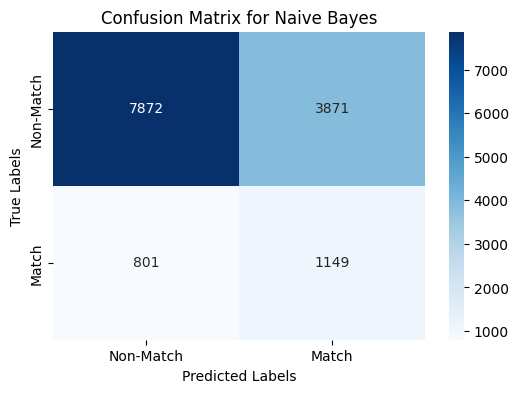


Evaluating Random Forest...
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11743
           1       0.76      0.59      0.66      1950

    accuracy                           0.91     13693
   macro avg       0.85      0.78      0.81     13693
weighted avg       0.91      0.91      0.91     13693



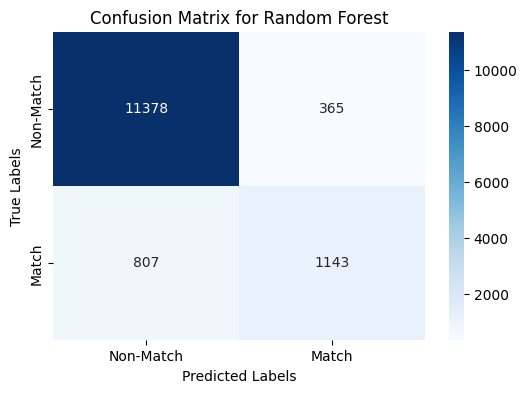

In [ ]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Match", "Match"],
                yticklabels=["Non-Match", "Match"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

# Evaluate each model
models = {
    "Decision Tree": best_dt_model,
    "Logistic Regression": best_lr_model,
    "Naive Bayes": best_nb_model,
    "Random Forest": best_rf_model
}

for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test_tfidf)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, model_name)


CROSS-VALIDATION FOR ALL MODELS

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Perform cross-validation using resampled data
for model_name, model in models.items():
    print(f"\nCross-Validation for {model_name}...")
    # Use X_train_resampled and y_train_resampled
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring='accuracy')
    print(f"Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {np.mean(scores):.4f}")



Cross-Validation for Decision Tree...
Accuracy Scores: [0.85301935 0.93477221 0.93195471 0.93190155 0.93450641]
Mean Accuracy: 0.9172

Cross-Validation for Logistic Regression...
Accuracy Scores: [0.86030193 0.86991654 0.8697039  0.87337196 0.87321248]
Mean Accuracy: 0.8693

Cross-Validation for Naive Bayes...
Accuracy Scores: [0.65064852 0.64536707 0.64940726 0.6468024  0.65025783]
Mean Accuracy: 0.6485

Cross-Validation for Random Forest...
Accuracy Scores: [0.88704019 0.96773165 0.96565839 0.96603051 0.96836957]
Mean Accuracy: 0.9510


From the current results now, random forest is the best model

RE-EVALUATING THE Fine-Tuned Random Forest on the Test Data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test data using the fine-tuned Random Forest model
print("Evaluating Fine-Tuned Random Forest Model on Test Data...\n")

y_test_pred = best_rf_model.predict(X_test_tfidf)

# Generate evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

# Calculate Accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nAccuracy on Test Data: {test_accuracy:.4f}")


Evaluating Fine-Tuned Random Forest Model on Test Data...

Confusion Matrix:
[[11378   365]
 [  807  1143]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     11743
           1       0.76      0.59      0.66      1950

    accuracy                           0.91     13693
   macro avg       0.85      0.78      0.81     13693
weighted avg       0.91      0.91      0.91     13693


Accuracy on Test Data: 0.9144


SAVING THE FINE-TUNED MODEL

In [ ]:
from joblib import dump

# Save the best model
dump(best_rf_model, 'fine_tuned_random_forest.joblib')
print("Fine-Tuned Random Forest Model Saved Successfully!")


Fine-Tuned Random Forest Model Saved Successfully!


FLOW CHART OF TASK PROCESS

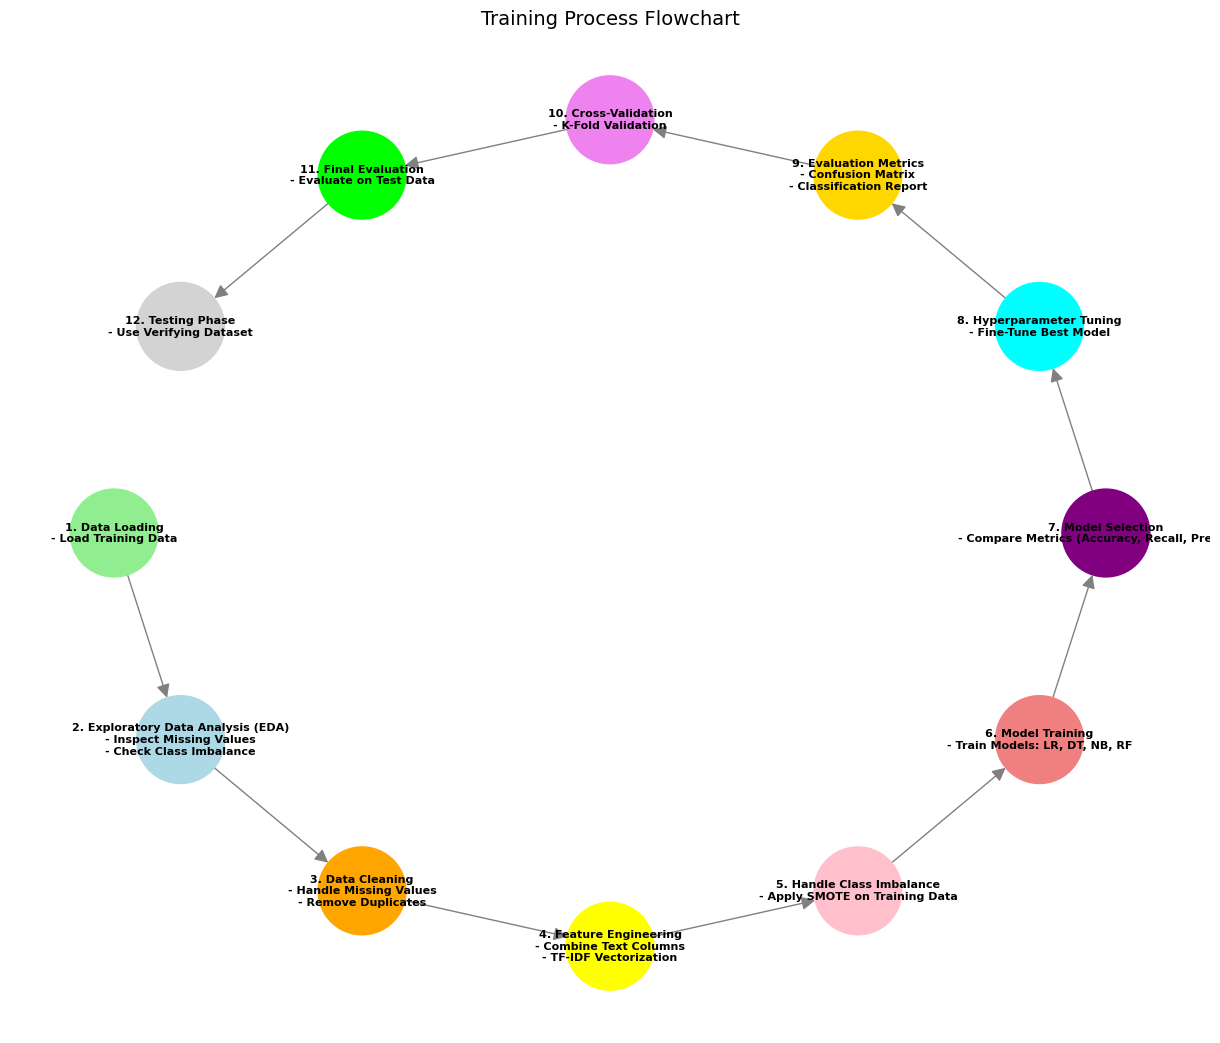

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add nodes for each step in the process
steps = [
    "1. Data Loading\n- Load Training Data",
    "2. Exploratory Data Analysis (EDA)\n- Inspect Missing Values\n- Check Class Imbalance",
    "3. Data Cleaning\n- Handle Missing Values\n- Remove Duplicates",
    "4. Feature Engineering\n- Combine Text Columns\n- TF-IDF Vectorization",
    "5. Handle Class Imbalance\n- Apply SMOTE on Training Data",
    "6. Model Training\n- Train Models: LR, DT, NB, RF",
    "7. Model Selection\n- Compare Metrics (Accuracy, Recall, Precision)",
    "8. Hyperparameter Tuning\n- Fine-Tune Best Model",
    "9. Evaluation Metrics\n- Confusion Matrix\n- Classification Report",
    "10. Cross-Validation\n- K-Fold Validation",
    "11. Final Evaluation\n- Evaluate on Test Data",
    "12. Testing Phase\n- Use Verifying Dataset"
]

# Add edges to define the flow
edges = [
    (steps[i], steps[i+1]) for i in range(len(steps)-1)
]

# Add nodes and edges to the graph
G.add_nodes_from(steps)
G.add_edges_from(edges)

# Improved layout using shell layout (clear hierarchical order)
pos = nx.shell_layout(G)

# Plot settings
node_colors = [
    'lightgreen', 'lightblue', 'orange', 'yellow', 'pink',
    'lightcoral', 'purple', 'cyan', 'gold', 'violet', 'lime', 'lightgray'
]

# Plot the graph
plt.figure(figsize=(12, 10))  # Set figure size
nx.draw(G, pos, with_labels=True, node_size=4000, node_color=node_colors,
        font_size=8, font_weight='bold', arrowsize=20, edge_color='gray')

plt.title("Training Process Flowchart", fontsize=14)
plt.show()


USING THE SAVED MODEL FOR PREDICTION (USING THE VERIFYING DATA)

In [ ]:
#load the verifying dataset
verifying_data_path = '/content/drive/MyDrive/verifyingData (1).gz'


In [ ]:
verifying_data = pd.read_json('/content/drive/MyDrive/verifyingData (1).gz', lines=True)
verifying_data.head()

,id_left,category_left,cluster_id_left,id_right,category_right,cluster_id_right,label,pair_id,brand_left,brand_right,description_left,description_right,keyValuePairs_left,keyValuePairs_right,price_left,price_right,specTableContent_left,specTableContent_right,title_left,title_right
0,581109,Computers_and_Accessories,1324529,16637861,Computers_and_Accessories,107415,0,581109#16637861,"""Gigabyte""@en","""Gigabyte""@en","""GV-RX480G1 GAMING-4GD, Core Clock: 1202MHz, B...","""GV-RX550GAMING OC-2GD, Boost: 1219MHz, Memory...",None,None,None,None,None,None,"""Gigabyte Radeon RX 480 G1 Gaming 4096MB GDDR...","""Gigabyte Radeon RX 550 Gaming OC 2048MB GDDR..."
1,3083228,Computers_and_Accessories,640007,3424944,Computers_and_Accessories,640007,1,3083228#3424944,"""Benq""","""Zowie ""","""\n More>>>\n \n...","""\n\n Every det...",None,None,None,None,None,None,"""Benq ZOWIE RL2455 24"" Full HD TN Grey comput...","""Zowie RL2455 E-Sports 24"" Full HD LED Monito..."
2,5942105,Computers_and_Accessories,1464841,770253,Computers_and_Accessories,83732,0,5942105#770253,None,None,"""Apple Mac mini - DTS - 1 x Core i5 2.8 GHz - ...","""Null""@es",None,None,None,None,None,None,"""Apple Mac mini 2.8GHz Intel Core i5""@es ""Mac...","""Mac Mini Qc I5 2.6ghz/8gb/1tb/iris Graphics""..."
3,1282014,Computers_and_Accessories,173820,16999524,Other_Electronics,14668779,0,1282014#16999524,"""TP-Link""@en-US",None,"""8 port Switch for adding more ports to your r...","""This product is ENERGY STAR qualified for its...",None,None,None,"""$"", ""95.99""",None,None,"""TP-LINK 8-Port Fast Ethernet Desktop Switch ...","""Tripp Lite 750VA 450W UPS Eco Green Battery ..."
4,7969280,Computers_and_Accessories,224463,6000979,Computers_and_Accessories,1438223,0,7969280#6000979,"""Kingston""@pt",None,"""A drive USB flash Kingston DataTraveler® 100 ...",None,None,None,None,None,None,None,"""Pen Kingston DataTraveler 100 G3 32GB USB3.0...","""Kingston DataTraveler 100 G3 128GB USB3.0""@e..."


Pre-Prpcessing the Verifying Dataset

In [ ]:
verifying_data['combined_text'] = (
    verifying_data['title_left'].fillna('') + " " +
    verifying_data['title_right'].fillna('') + " " +
    verifying_data['description_left'].fillna('') + " " +
    verifying_data['description_right'].fillna('')
)

In [ ]:
import joblib
joblib.dump(vectorizer, "tfidf_vectorizer.joblib")
print("TF-IDF Vectorizer Saved Successfully!")

TF-IDF Vectorizer Saved Successfully!


In [ ]:
#Loading the saved vectorizer
# Reload the TF-IDF Vectorizer
import joblib

vectorizer_path = "tfidf_vectorizer.joblib"
vectorizer = joblib.load(vectorizer_path)

print("TF-IDF Vectorizer loaded successfully!")

# Transform the verifying data
X_verify_tfidf = vectorizer.transform(verifying_data['combined_text'])
print(f"TF-IDF Matrix Shape for Verifying Data: {X_verify_tfidf.shape}")


TF-IDF Vectorizer loaded successfully!
TF-IDF Matrix Shape for Verifying Data: (1100, 5000)


**Load** The Saved Model (Random Forest) to Perform the Testing

In [ ]:
import joblib

# Load the saved fine-tuned Random Forest model
model_path = "fine_tuned_random_forest.joblib"  # The saved model name
best_rf_model = joblib.load(model_path)

print("Fine-Tuned Random Forest Model Loaded Successfully!")


Fine-Tuned Random Forest Model Loaded Successfully!


PERFORM PREDICTIONS USING THE VERIFYING DATASET

In [ ]:
# Perform predictions on the verifying dataset
y_verify_pred = best_rf_model.predict(X_verify_tfidf)

# Add predictions to the verifying dataset
verifying_data['predicted_label'] = y_verify_pred

# Display the predictions
print("Predictions on Verifying Dataset:")
print(verifying_data[['combined_text', 'predicted_label']].head())

# Save the results to a new file for future use
output_path = "verifying_data_with_predictions.csv"
verifying_data.to_csv(output_path, index=False)
print(f"Predictions saved to '{output_path}'")


Predictions on Verifying Dataset:
                                       combined_text  predicted_label
0   "Gigabyte Radeon RX 480 G1 Gaming 4096MB GDDR...                0
1   "Benq ZOWIE RL2455 24" Full HD TN Grey comput...                1
2   "Apple Mac mini 2.8GHz Intel Core i5"@es "Mac...                0
3   "TP-LINK 8-Port Fast Ethernet Desktop Switch ...                0
4   "Pen Kingston DataTraveler 100 G3 32GB USB3.0...                1
Predictions saved to 'verifying_data_with_predictions.csv'


EVALUATING THE MODEL PERFORMANCE

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Check if 'label' column exists
if 'label' in verifying_data.columns:
    y_verify_true = verifying_data['label']

    # Generate evaluation metrics
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_verify_true, y_verify_pred))

    print("\nClassification Report:")
    print(classification_report(y_verify_true, y_verify_pred))

    test_accuracy = accuracy_score(y_verify_true, y_verify_pred)
    print(f"\nAccuracy on Verifying Dataset: {test_accuracy:.4f}")
else:
    print("No ground-truth labels provided in the verifying dataset.")



Confusion Matrix:
[[767  33]
 [207  93]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86       800
           1       0.74      0.31      0.44       300

    accuracy                           0.78      1100
   macro avg       0.76      0.63      0.65      1100
weighted avg       0.77      0.78      0.75      1100


Accuracy on Verifying Dataset: 0.7818


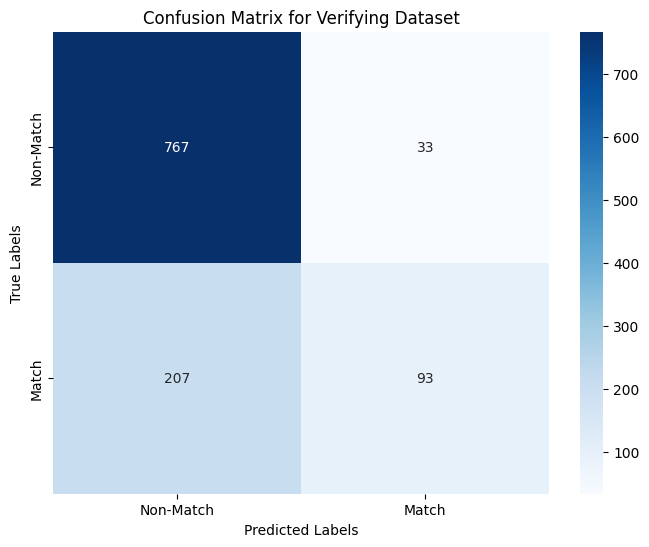

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_verify_true, y_verify_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Match', 'Match'], yticklabels=['Non-Match', 'Match'])
plt.title("Confusion Matrix for Verifying Dataset")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:

# Save the results into a CSV file
output_path = "verifying_data_with_predictions_and_results.csv"
verifying_data.to_csv(output_path, index=False)
print(f"\nPredictions and evaluation results saved to: {output_path}")

# Display a preview of the results
print("\nFinal Results with Predictions:")
print(verifying_data.head())


Predictions and evaluation results saved to: verifying_data_with_predictions_and_results.csv

Final Results with Predictions:
   id_left              category_left  cluster_id_left  id_right  \
0   581109  Computers_and_Accessories          1324529  16637861   
1  3083228  Computers_and_Accessories           640007   3424944   
2  5942105  Computers_and_Accessories          1464841    770253   
3  1282014  Computers_and_Accessories           173820  16999524   
4  7969280  Computers_and_Accessories           224463   6000979   

              category_right  cluster_id_right  label           pair_id  \
0  Computers_and_Accessories            107415      0   581109#16637861   
1  Computers_and_Accessories            640007      1   3083228#3424944   
2  Computers_and_Accessories             83732      0    5942105#770253   
3          Other_Electronics          14668779      0  1282014#16999524   
4  Computers_and_Accessories           1438223      0   7969280#6000979   

        brand

In [ ]:
from google.colab import files

# Path to the output CSV file
output_path = "verifying_data_with_predictions_and_results.csv"

# Download the CSV file
files.download(output_path)
from google.colab import files

# Path to the output CSV file
output_path = "verifying_data_with_predictions_and_results.csv"

# Download the CSV file
files.download(output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

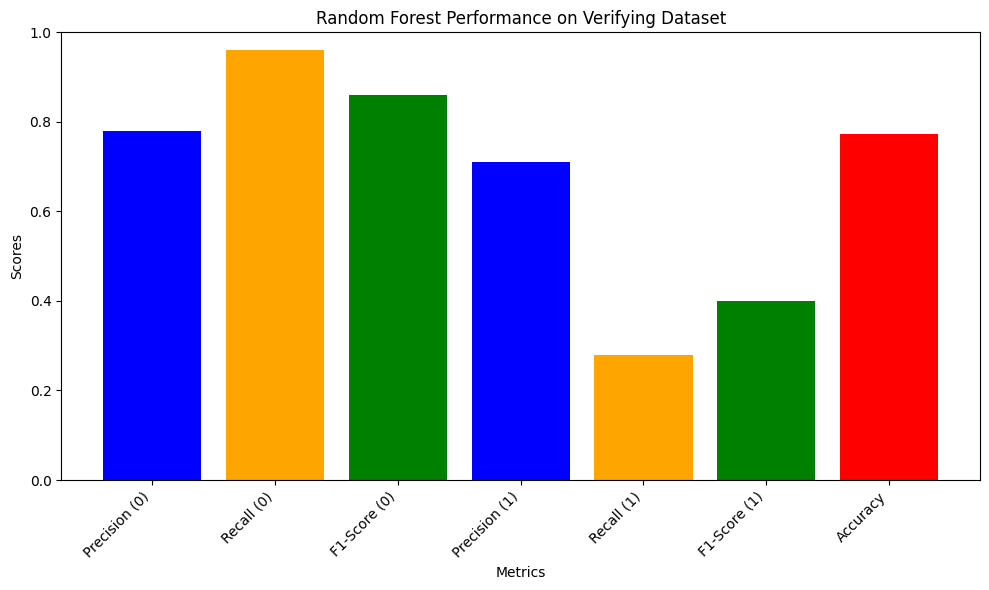

In [ ]:
import matplotlib.pyplot as plt

# Define the metrics and values
metrics = ['Precision (0)', 'Recall (0)', 'F1-Score (0)',
           'Precision (1)', 'Recall (1)', 'F1-Score (1)',
           'Accuracy']
values = [0.78, 0.96, 0.86,  # Class 0 metrics
          0.71, 0.28, 0.40,  # Class 1 metrics
          0.7727]            # Overall accuracy

# Set custom colors for better visualization
colors = ['blue', 'orange', 'green', 'blue', 'orange', 'green', 'red']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=colors)
plt.title('Random Forest Performance on Verifying Dataset')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.ylim(0, 1)  # Ensure the y-axis limit is between 0 and 1
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()

# Show the plot
plt.show()


FURTHER ENHANCEMENTS

In [ ]:
#Feature Selection: Experimenting with Selecting Most Informative Words


# Extract feature names from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Get feature importance from the trained Random Forest model
importances = best_rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]  # Sort in descending order

# Display top N features (e.g., top 20)
top_n = 20
print(f"Top {top_n} Informative Words in TF-IDF:")
for i in range(top_n):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

# Visualize the top features
plt.figure(figsize=(12, 6))
plt.barh(range(top_n), importances[indices[:top_n]], align='center', color='skyblue')
plt.yticks(range(top_n), [feature_names[i] for i in indices[:top_n]])
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.title("Top Informative Words from TF-IDF")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
# I skipped the ensemble method because it is taking too much time

In [ ]:
#3. Explainability: Use SHAP or LIME to Explain Predictions
import shap

# Convert the sparse matrix to dense format
X_test_dense = X_test_tfidf.toarray()

# Create SHAP Explainer for the Random Forest model
explainer = shap.Explainer(best_rf_model, X_test_dense)

# Generate SHAP values
shap_values = explainer(X_test_dense)

# Plot summary of SHAP values
shap.summary_plot(shap_values, X_test_dense, feature_names=vectorizer.get_feature_names_out())


In [ ]:
#4. Deployment: Deploying the model as a rest api

!pip install flask joblib


In [ ]:
#create a flask application

from flask import Flask, request, jsonify
import joblib

# Initialize Flask App
app = Flask(__name__)

# Load the trained Random Forest model and TF-IDF vectorizer
model = joblib.load('fine_tuned_random_forest.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')

# Define a route for predictions
@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json()
        text_data = data['text']  # Assuming 'text' key contains the input

        # Preprocess the text using the vectorizer
        text_tfidf = vectorizer.transform([text_data])

        # Make predictions
        prediction = model.predict(text_tfidf)
        response = {'prediction': int(prediction[0])}

        return jsonify(response)
    except Exception as e:
        return jsonify({'error': str(e)})

# Run the Flask app
if __name__ == '__main__':
    app.run(debug=True)
